In [ ]:
  #AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,
  #DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL POR ESSE PROGRAMA.
  #TODAS AS PARTES ORIGINAIS DESSE EXERCÍCIO-PROGRAMA (EP) FORAM
  #DESENVOLVIDAS E IMPLEMENTADAS POR MIM SEGUINDO AS INSTRUÇÕES DESSE
  #EP E QUE PORTANTO NÃO CONSTITUEM PLÁGIO. DECLARO TAMBÉM QUE SOU
  #RESPONSÁVEL POR TODAS AS CÓPIAS DESSE PROGRAMA E QUE EU NÃO
  #DISTRIBUI OU FACILITEI A SUA DISTRIBUIÇÃO. ESTOU CIENTE DE QUE OS
  #CASOS DE PLÁGIO SÃO PUNIDOS COM REPROVAÇÃO DIRETA NA DISCIPLINA.

  #NOME: Lucas Quaresma Medina Lam
  #NUSP: 11796399
    
  #NOME: Roberto Oliveira Bolgheroni
  #NUSP: 11796430
    
  #NOME: Gabriel Fernandes Mota
  #NUSP: 11796402
    
  #Referências: com a exceção de códigos fornecidos no enunciado e em
  #aula, caso você tenha utilizado alguma referência, liste-as
  #explicitamente para que seu programa não seja considerada plágio.

  #Exemplo:

  #- Meu programa é baseado no programa DoublyLinkedList.java em
  #  https://algs4.cs.princeton.edu/13stacks/DoublyLinkedList.java.html

In [ ]:
!pip install pyproj

In [ ]:
import matplotlib.pyplot as plt

from datetime import datetime
import json

import numpy as np

from pyproj import Proj, transform

In [ ]:
json_brasil = "brasil_1352555.json"
json_espanha = "espanha_24389.json"

with open(json_brasil, "r") as f:
    pontos_brasil = f.read()
    pontos_brasil = json.loads(pontos_brasil)
    
with open(json_espanha, "r") as f:
    pontos_espanha = f.read()
    pontos_espanha = json.loads(pontos_espanha)
    
pontos_brasil = pontos_brasil['osv']['photos'][15430:15570]
pontos_espanha = pontos_espanha['osv']['photos'][2622:2744]

In [ ]:
#print(f"Chaves na raiz - \n{pontos_brasil.keys()}\n")
#print(f"Chaves do objeto na chave 'status' - \n{pontos_brasil['status'].keys()}\n")
#print(f"Chaves do objeto na chave 'osv' - \n{pontos_brasil['osv'].keys()}")

In [ ]:
#pontos_brasil['osv']['photos'][15570]
#pontos_espanha[0]


In [ ]:
from photos_extract import make_extract_photos_JSON, get_photo_array_positions, clean_extracted

jsonfile_brasil = 'brasil_1352555.json'
jsonfile_espanha = 'espanha_24389.json'


extracted_filenameBR = "extracted_" + jsonfile_brasil
cleaned_filenameBR = "cleaned_" + jsonfile_brasil

extracted_filenameES = "extracted_" + jsonfile_espanha
cleaned_filenameES = "cleaned_" + jsonfile_espanha

with open(jsonfile_brasil, "r") as jf:
        # Aqui o array 'photos' é extraído e colocado 
        # em outro arquivo (com o prefixo extracted_),
        # para facilitar o processamento do array.
        #
        # Em seguida usamos a função clean_extracted para
        # criar um terceiro arquivo (com prefixo _cleaned)
        # que contenha somente os campos de interesse para
        # a análise.
        txt = jf.read()
        extracted_str = make_extract_photos_JSON(extracted_filenameBR, txt)

        with open(cleaned_filenameBR, "w") as cjf:
            cjf.write(clean_extracted(extracted_str))
            
with open(jsonfile_espanha, "r") as jf:
        # Aqui o array 'photos' é extraído e colocado 
        # em outro arquivo (com o prefixo extracted_),
        # para facilitar o processamento do array.
        #
        # Em seguida usamos a função clean_extracted para
        # criar um terceiro arquivo (com prefixo _cleaned)
        # que contenha somente os campos de interesse para
        # a análise.
        txt = jf.read()
        extracted_str = make_extract_photos_JSON(extracted_filenameES, txt)

        with open(cleaned_filenameES, "w") as cjf:
            cjf.write(clean_extracted(extracted_str))

In [ ]:
# Vamos carregar os pontos (do JSON filtrado) na variável pontos.
arquivo_pontosBR = "cleaned_brasil_1352555.json"
faixa_de_pontosBR = slice(15430, 15571, 1)
    
with open(arquivo_pontosBR, "r") as f:
    pontosBR = f.read()
    pontosBR = json.loads(pontosBR)
    pontosBR = pontosBR['photos'][faixa_de_pontosBR]

#print(pontosBR[140])

arquivo_pontosES = "cleaned_espanha_24389.json"
faixa_de_pontosES = slice(2622, 2745, 1)
    
with open(arquivo_pontosES, "r") as f:
    pontosES = f.read()
    pontosES = json.loads(pontosES)
    pontosES = pontosES['photos'][faixa_de_pontosES]


print(pontosES[122])


{'lat': '40.782212', 'lng': '-2.982487', 'heading': '139.297577', 'shot_date': '2016-10-03 08:50:57'}


In [ ]:
#********PROJEÇÃO POR MERCATOR ***********

def get_point_coords_proj(index, points_object):
    """
    Essa função é similar a get_point_coords, ela 
    recebe um índice numérico correspondendo a uma
    posição na lista de pontos "points_object".
    
    Contudo esta os pontos na projeção EPSG:3857 em
    que a unidade de medida é em metros e portanto
    podemos calcular a distância euclidiana entre dois
    pontos com base em suas coordenadas.
    
    Os pontos retornados são um vetor numpy em que
    a primeira posição é uma medida em metros no eixo
    horizontal e a segunda é num eixo vertical.
    O ponto de origem pode ser visto aqui https://epsg.io/3857
    """
    
    lat = points_object[index]['lat']
    lat = float(lat)
    lng = points_object[index]['lng']
    lng = float(lng)
    p = np.array((lng, lat))
    p = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), p[0], p[1])
    return p

In [ ]:
FMT = '%Y-%m-%d %H:%M:%S'
def get_shot_time(index, points_object):
    """
    Retorna a data e hora em que o ponto 'index',
    da lista de pontos 'points_object', foi criado.

    O formato de retorno é uma string '%Y-%m-%d %H:%M:%S'
    (e.g. 2018-03-03 20:55:32)
    """
    t = points_object[index]['shot_date']
    t = datetime.strptime(t, FMT)
    return t

In [ ]:
def tempo_decorrido(pontos, i):
    tdelta = get_shot_time(i+1, pontos)-get_shot_time(i, pontos)

    return tdelta.seconds;

In [ ]:
def distancia_euclidiana(v1, v2):
    """
    Tendo como parâmetros os vetores numpy 2D 'v1' e 'v2', crie uma
    função que retorne a distância euclidiana entre os dois vetores.
    """
    distancia = (((v2[0] - v1[0])**2) + ((v2[1] - v1[1])**2))**(1/2)
    return distancia

In [ ]:
import warnings
warnings.filterwarnings('ignore')

somaBR = 0
dist_trecho_BR_euc = []
dist_parcial_BR_euc = []
tempoBR = []
vel_BR_euc = []
for i in range(0,140):
    pp1 = get_point_coords_proj(i, pontosBR)
    pp2 = get_point_coords_proj(i+1, pontosBR)
    
    dist = distancia_euclidiana(pp1, pp2)
    dist_trecho_BR_euc.append(dist)
    
    somaBR += dist
    dist_parcial_BR_euc.append(somaBR)
    
    if i > 0:
        tempoBR.append(tempo_decorrido(pontosBR, i) + tempoBR[i - 1])
    else:
        tempoBR.append(tempo_decorrido(pontosBR, i))
    vel_BR_euc.append(dist_trecho_BR_euc[i]/ tempo_decorrido(pontosBR, i))
    #print(f'trecho {i} {i+1} ; d = {dist}')

somaES = 0
dist_trecho_ES_euc = []
dist_parcial_ES_euc = []
tempoES = []
vel_ES_euc = []
for i in range(0,122):
    pp1 = get_point_coords_proj(i, pontosES)
    pp2 = get_point_coords_proj(i+1, pontosES)
    
    dist = distancia_euclidiana(pp1, pp2)
    dist_trecho_ES_euc.append(dist)
    
    somaES += dist
    dist_parcial_ES_euc.append(somaES)
    
    if i > 0:
        tempoES.append(tempo_decorrido(pontosES, i) + tempoES[i-1])
    else:
        tempoES.append(tempo_decorrido(pontosES, i))
    vel_ES_euc.append(dist_trecho_ES_euc[i]/ tempo_decorrido(pontosES, i))
    #print(f'trecho {i} {i+1} ; d = {dist}')
    
print(somaBR)
print(somaES)

3214.048296599276
3988.7360318910864


In [ ]:
# ************** FÓRMULA DE HAVERSINE ********************

def get_point_coords(index, points_object):
    """
    Essa função recebe um índice numérico correspondendo a uma
    posição na lista de pontos "points_object".

    Ela retorna um vetor do numpy com a longitude e latitude
    (propriedades 'lng' e 'lat') do ponto na posição 'index'.
    """
    lat = points_object[index]['lat']
    lat = float(lat)
    lng = points_object[index]['lng']
    lng = float(lng)
    return np.array((lng, lat))

In [ ]:
from math import asin, sin, cos, sqrt, pi

def degrees_to_rad(x):
  return x * pi / 180

def distancia_haversiana(pp1, pp2):
    raio = 6371000
    pp1 = degrees_to_rad(pp1)
    pp2 = degrees_to_rad(pp2)
    sin_lat = sin(abs(pp2[1] - pp1[1]) / 2)
    sin_lng = sin(abs(pp2[0] - pp1[0]) / 2)
    raiz = sqrt(sin_lat**2 + cos(pp1[1]) * cos(pp2[1]) * sin_lng**2)
    return (2 * raio * asin(raiz))

In [ ]:
somaBR = 0
dist_trecho_BR_h = []
dist_parcial_BR_h = []
vel_BR_h = []
for i in range(0,140):
    pp1 = get_point_coords(i, pontosBR)
    pp2 = get_point_coords(i+1, pontosBR)

    dist = distancia_haversiana(pp1, pp2)
    dist_trecho_BR_h.append(dist)
    vel_BR_h.append(dist_trecho_BR_h[i]/ tempo_decorrido(pontosBR, i))
    
    somaBR += dist
    dist_parcial_BR_h.append(somaBR)
    #print(f'trecho {i} {i+1} ; d = {dist}')

somaES = 0
dist_trecho_ES_h = []
dist_parcial_ES_h = []
vel_ES_h = []
for i in range(0,122):
    pp1 = get_point_coords(i, pontosES)
    pp2 = get_point_coords(i+1, pontosES)
    
    dist = distancia_haversiana(pp1, pp2)
    dist_trecho_ES_h.append(dist)
    vel_ES_h.append(dist_trecho_ES_h[i]/ tempo_decorrido(pontosES, i))
    
    somaES += dist
    dist_parcial_ES_h.append(somaES)
    #print(f'trecho {i} {i+1} ; d = {dist}')

print(somaBR)
print(somaES)
print(3000/tempoBR[139])
print(3000/tempoES[121])


3030.739280709878
3017.3048963436813
21.428571428571427
21.12676056338028


In [ ]:
# ************** FÓRMULA TRIGONOMÉTRICA ********************
from math import acos

def distancia_trigonometrica(pp1, pp2):
    pp1 = degrees_to_rad(pp1)
    pp2 = degrees_to_rad(pp2)
    C = sin(pp1[1])*sin(pp2[1]) + cos(pp1[0]-pp2[0])*cos(pp1[1])*cos(pp2[1])
    raio = 6371000
    return raio * acos(C)

In [ ]:
somaBR = 0
dist_trecho_BR_tg = []
dist_parcial_BR_tg = []
vel_BR_tg = []
for i in range(0,140):
    pp1 = get_point_coords(i, pontosBR)
    pp2 = get_point_coords(i+1, pontosBR)

    dist = distancia_trigonometrica(pp1, pp2)
    dist_trecho_BR_tg.append(dist)
    vel_BR_tg.append(dist_trecho_BR_tg[i]/ tempo_decorrido(pontosBR, i))
    
    somaBR += dist
    dist_parcial_BR_tg.append(somaBR)
    #print(f'trecho {i} {i+1} ; d = {dist}')

somaES = 0
dist_trecho_ES_tg = []
dist_parcial_ES_tg = []
vel_ES_tg = []
for i in range(0,122):
    pp1 = get_point_coords(i, pontosES)
    pp2 = get_point_coords(i+1, pontosES)
    
    dist = distancia_trigonometrica(pp1, pp2)
    dist_trecho_ES_tg.append(dist)
    vel_ES_tg.append(dist_trecho_ES_tg[i]/ tempo_decorrido(pontosES, i))
    
    somaES += dist
    dist_parcial_ES_tg.append(somaES)
    #print(f'trecho {i} {i+1} ; d = {dist}')

print(somaBR)
print(somaES)


3030.736053509617
3017.3065716517026
21.648114667925835
21.248637828533116


In [ ]:
t = get_shot_time(0, pontosBR)
print(t.day)

23


In [ ]:
#print(vel_ES_h)
#print(tempoES)
print(dist_parcial_ES_h)

[16.251705841468286, 35.98124584234533, 57.323268778300346, 78.94276639980004, 102.7063277709258, 128.54727935082934, 154.62244496282744, 183.6528636111648, 211.66248612147731, 238.18986744384722, 268.5163818861968, 299.534209961475, 334.03405347658145, 367.4876042392257, 389.05748607998504, 425.24743173747515, 461.7598430216682, 499.31073211143314, 537.0994766189741, 558.217927821303, 598.8489619538042, 636.3990858611527, 657.3520439711848, 679.0805266718199, 700.6384080493661, 722.5079885408003, 745.4470401397809, 771.3031497877423, 795.322151523852, 818.8670894897219, 842.1991775412598, 862.7560604216677, 886.3039570671045, 913.5463293939297, 935.268744627362, 959.0924809483224, 982.2551267172795, 1004.7323432688843, 1027.9104529321203, 1051.7013209617019, 1076.7596544449357, 1099.9488555471833, 1122.976854441347, 1143.2238963925738, 1168.4082997977741, 1191.8950190188139, 1217.2186683253078, 1240.1806787822793, 1263.176541216993, 1286.7516552539755, 1311.5054936232311, 1337.2085886

In [ ]:
def plot_dist_time(dist_vec, time_vec, title, marker='.', **kwargs):
    #fig, ax = plt.subplots(1, **kwargs)
    fig, ax = plt.subplots(1, figsize=(16,8))
    ax.scatter(time_vec, dist_vec, marker=marker)
    ax.set_title(title)
    ax.set_xlabel('tempo decorrido (s)', fontsize=14);
    ax.set_ylabel('distância percorrida (m)', fontsize=14);
    return fig, ax

Trecho na Espanha


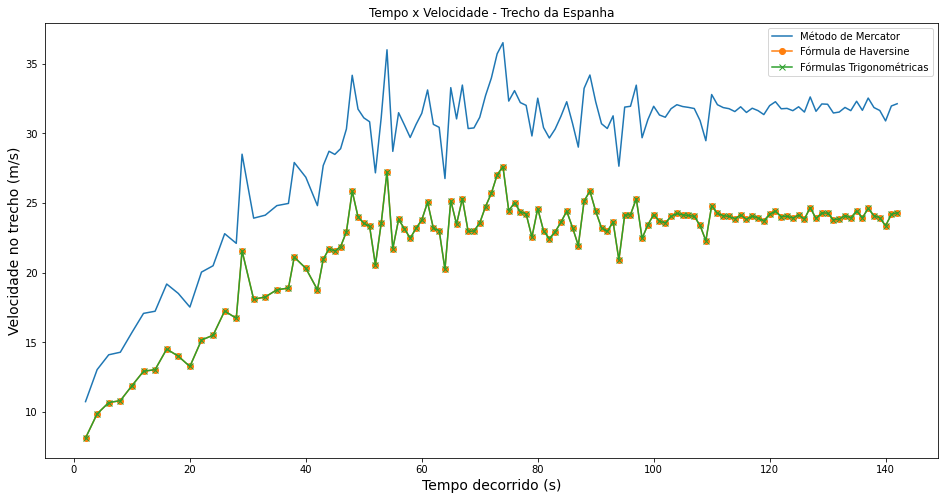

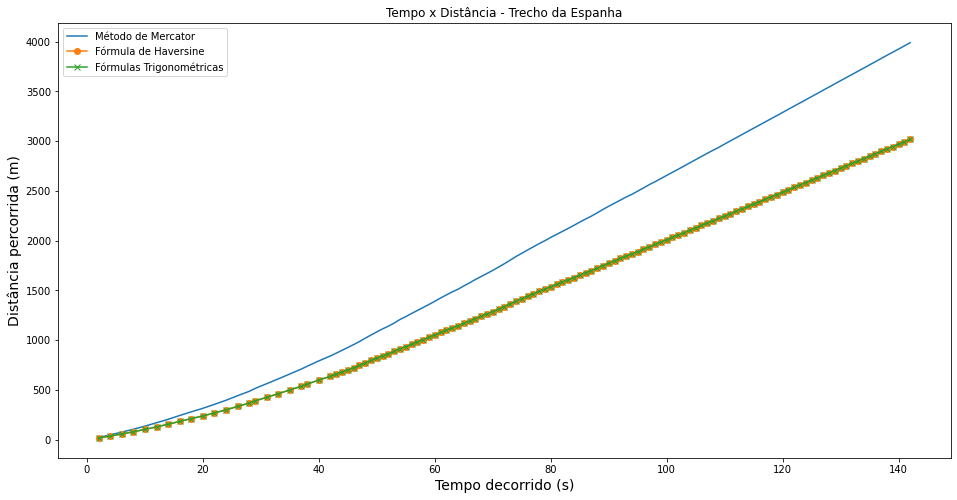

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,8))
ax.plot(tempoES, vel_ES_euc, label='Método de Mercator')
ax.plot(tempoES, vel_ES_h, label='Fórmula de Haversine', marker='o')
ax.plot(tempoES, vel_ES_tg, label='Fórmulas Trigonométricas', marker='x')
ax.legend()
ax.set_title('Tempo x Velocidade - Trecho da Espanha')
ax.set_xlabel('Tempo decorrido (s)', fontsize=14);
ax.set_ylabel('Velocidade no trecho (m/s)', fontsize=14);

fig, ax = plt.subplots(1, figsize=(16,8))
ax.plot(tempoES, dist_parcial_ES_euc, label='Método de Mercator')
ax.plot(tempoES, dist_parcial_ES_h, label='Fórmula de Haversine', marker='o')
ax.plot(tempoES, dist_parcial_ES_tg, label='Fórmulas Trigonométricas', marker='x')
ax.legend()
ax.set_title('Tempo x Distância - Trecho da Espanha')
ax.set_xlabel('Tempo decorrido (s)', fontsize=14);
ax.set_ylabel('Distância percorrida (m)', fontsize=14);

Trecho no Brasil

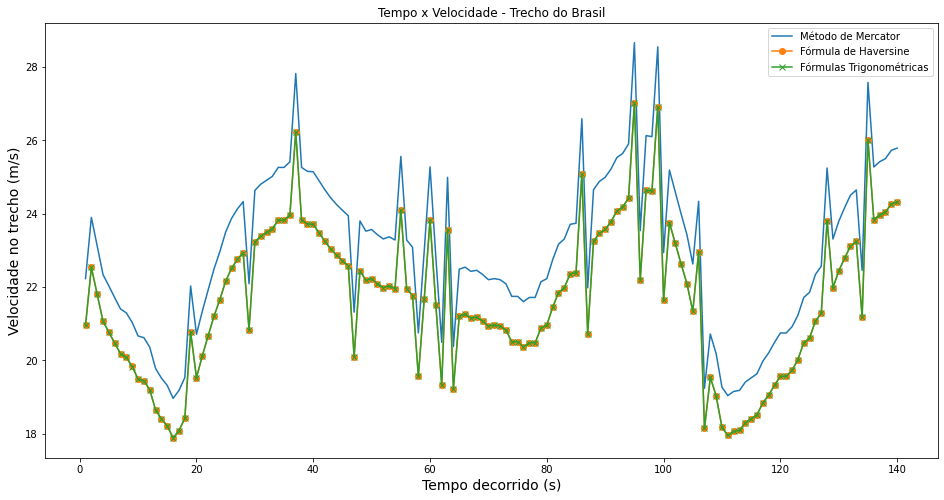

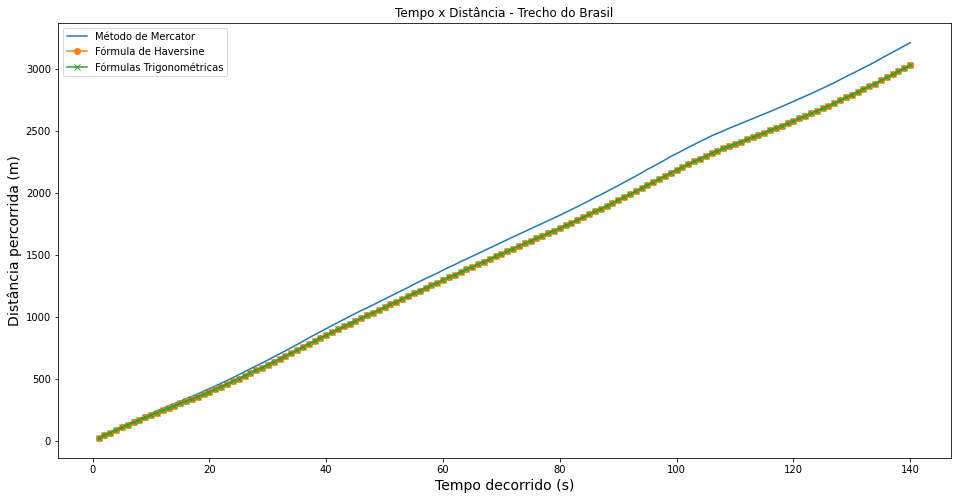

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,8))
ax.plot(tempoBR, vel_BR_euc, label='Método de Mercator')
ax.plot(tempoBR, vel_BR_h, label='Fórmula de Haversine', marker='o')
ax.plot(tempoBR, vel_BR_tg, label='Fórmulas Trigonométricas', marker='x')
ax.legend()
ax.set_title('Tempo x Velocidade - Trecho do Brasil')
ax.set_xlabel('Tempo decorrido (s)', fontsize=14);
ax.set_ylabel('Velocidade no trecho (m/s)', fontsize=14);

fig, ax = plt.subplots(1, figsize=(16,8))
ax.plot(tempoBR, dist_parcial_BR_euc, label='Método de Mercator')
ax.plot(tempoBR, dist_parcial_BR_h, label='Fórmula de Haversine', marker='o')
ax.plot(tempoBR, dist_parcial_BR_tg, label='Fórmulas Trigonométricas', marker='x')
ax.legend()
ax.set_title('Tempo x Distância - Trecho do Brasil')
ax.set_xlabel('Tempo decorrido (s)', fontsize=14);
ax.set_ylabel('Distância percorrida (m)', fontsize=14);